In [70]:
import sys
import pickle
import os
os.chdir(r'C:\\Users\gailt\\Documents\\Machine Learning\\final_project')

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier,dump_classifier_and_data
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from time import time

In [2]:
data_dict = pickle.load(open("C:\\Users\gailt\\Documents\\Machine Learning\\final_project\\final_project_dataset.pkl", "r"))

# Enron Data

Creating a data frame from the dictionary

In [3]:
enron_data=pd.DataFrame.from_dict(data_dict, orient='index')

In [4]:
print "Number of people in Enron Data: ",len(enron_data)

Number of people in Enron Data:  146


In [5]:
enron_data

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582,NaN,NaN,228474,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


There are 146 rows and 21 features

Looking at the data there are many NaNs and they are string so will replace these with 0

In [6]:
enron_data.replace(to_replace='NaN', value=0.0, inplace=True)

In [7]:
enron_data

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,0.0,2195.0,152.0,65.0,False,0.0,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0,0.0
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,...,0.0,29.0,864523.0,0.0,False,0.0,-5104.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,...,0.0,0.0,2660303.0,0.0,False,0.0,-1386055.0,1586055.0,0,0.0
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,...,0.0,0.0,69.0,0.0,False,0.0,-201641.0,0.0,frank.bay@enron.com,0.0
BAZELIDES PHILIP J,80818.0,0.0,684694.0,860136.0,1599641.0,0.0,0.0,0.0,0.0,1599641.0,...,0.0,0.0,874.0,0.0,False,0.0,0.0,93750.0,0,0.0
BECK SALLY W,231330.0,7315.0,0.0,969068.0,0.0,700000.0,126027.0,2639.0,0.0,126027.0,...,0.0,4343.0,566.0,386.0,False,0.0,0.0,0.0,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,0.0,1110705.0,...,0.0,484.0,210698.0,108.0,True,0.0,-2334434.0,0.0,tim.belden@enron.com,228.0
BELFER ROBERT,0.0,0.0,-102500.0,102500.0,3285.0,0.0,0.0,0.0,44093.0,-44093.0,...,0.0,0.0,0.0,0.0,False,3285.0,0.0,0.0,0,0.0
BERBERIAN DAVID,216582.0,0.0,0.0,228474.0,1624396.0,0.0,869220.0,0.0,0.0,2493616.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,david.berberian@enron.com,0.0


In [8]:
print "Number of point of interest in the data: ",len(enron_data[enron_data['poi'] == True])

Number of point of interest in the data:  18


# Identify Outliers in the dataset

Looking at the names of the people and checking whether there is a name which is not a name of actual person

In [9]:
list(enron_data.index)

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

Looks like looking at the data "THE TRAVEL AGENCY IN THE PARK" is not a name of actual data so will remove this record from the analysis.

In [10]:
enron_data.drop(['THE TRAVEL AGENCY IN THE PARK'], axis = 0, inplace= True)

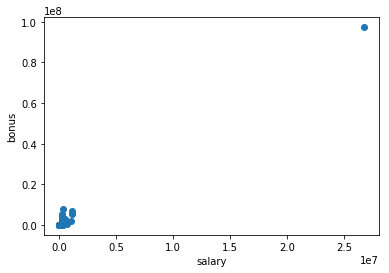

In [11]:
#features = ["salary", "bonus"]
plt.scatter(enron_data.salary,enron_data.bonus)

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

Glancing at the data looks like there is one data which stands out of all the points on the plot.
We can either check Salary or bonus for identifying the record.

Sorting the salaries in descending order to identify the record with maximum salary

In [12]:
max_salary = enron_data.sort_values(['salary'], ascending = False)

In [13]:
print max_salary[:1]

           salary  to_messages  deferral_payments  total_payments  \
TOTAL  26704229.0          0.0         32083396.0     309886585.0   

       exercised_stock_options       bonus  restricted_stock  \
TOTAL              311764000.0  97343619.0       130322299.0   

       shared_receipt_with_poi  restricted_stock_deferred  total_stock_value  \
TOTAL                      0.0                 -7576788.0        434509511.0   

                ...            loan_advances  from_messages       other  \
TOTAL           ...               83925000.0            0.0  42667589.0   

       from_this_person_to_poi    poi  director_fees  deferred_income  \
TOTAL                      0.0  False      1398517.0      -27992891.0   

       long_term_incentive  email_address from_poi_to_this_person  
TOTAL           48521928.0              0                     0.0  

[1 rows x 21 columns]


Looks like there is a record for Total in the dataset. We dont need this record for analysis. So, we will remove this record.

In [14]:
enron_data.drop(['TOTAL'], axis = 0, inplace= True)

In [15]:
len(enron_data)

144

Plotting the salary and bonus again after removing the Total field.

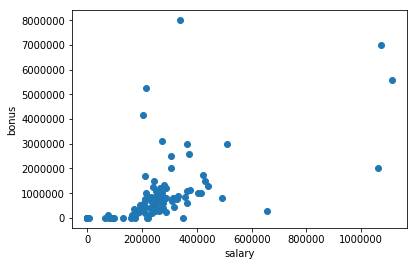

In [16]:
plt.scatter(enron_data.salary,enron_data.bonus)

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

Also, looking at the data there are some people where the bonus is too high compared to their salary. Looks like the ratio of bonus over salary would help us give insights of data. So, we can create a new feature bonus over salary.


From the above scatter plot it is clear that there are 4 records which are standing out. Lets investigate those 4 records

In [17]:
more_salary = enron_data.sort_values(['salary'], ascending = False)

In [18]:
more_salary["salary"][:4]

SKILLING JEFFREY K    1111258.0
LAY KENNETH L         1072321.0
FREVERT MARK A        1060932.0
PICKERING MARK R       655037.0
Name: salary, dtype: float64

Lets identify whether these are actually outliers or these are actually person of interest.

In [19]:
more_salary["poi"][:4]

SKILLING JEFFREY K     True
LAY KENNETH L          True
FREVERT MARK A        False
PICKERING MARK R      False
Name: poi, dtype: bool

As clear from above that SKILLING JEFFREY K and LAY KENNETH L cannot be ignored because they are Point of Interest. Even though FREVERT MARK A and PICKERING MARK R are not point of interest still we will keep them for further analysis.

Investigating POI and Long term incentive

In [20]:
print(enron_data['long_term_incentive'][enron_data['poi'] == True])

BELDEN TIMOTHY N              0.0
BOWEN JR RAYMOND M       974293.0
CALGER CHRISTOPHER F     375304.0
CAUSEY RICHARD A         350000.0
COLWELL WESLEY                0.0
DELAINEY DAVID W        1294981.0
FASTOW ANDREW S         1736055.0
GLISAN JR BEN F           71023.0
HANNON KEVIN P          1617011.0
HIRKO JOSEPH                  0.0
KOENIG MARK E            300000.0
KOPPER MICHAEL J         602671.0
LAY KENNETH L           3600000.0
RICE KENNETH D          1617011.0
RIEKER PAULA H                0.0
SHELBY REX                    0.0
SKILLING JEFFREY K      1920000.0
YEAGER F SCOTT                0.0
Name: long_term_incentive, dtype: float64


Looks like there are 12 people who are point of interest and they have long term incentive. This is a good feature to perform analysis. This is a huge number so we should consider this feature for further analysis

Analysing Poi and from messages

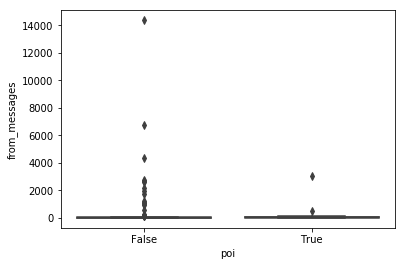

In [21]:
import seaborn as sns
sns.boxplot(data = enron_data.dropna(subset = ['poi', 'from_messages']), x = 'poi', y ='from_messages' )

From messages seem to be higher, on average, with more "outliers" for non-POIs

There is an person who sent more than 14000 emails and is not a POI

In [22]:
df_poi_from_message = enron_data.dropna(subset = ['poi', 'from_messages'])

max_from_messages = df_poi_from_message.sort_values(['from_messages'], ascending = False)

print max_from_messages[:1]

                       salary  to_messages  deferral_payments  total_payments  \
KAMINSKI WINCENTY J  275101.0       4607.0                0.0       1086821.0   

                     exercised_stock_options     bonus  restricted_stock  \
KAMINSKI WINCENTY J                 850010.0  400000.0          126027.0   

                     shared_receipt_with_poi  restricted_stock_deferred  \
KAMINSKI WINCENTY J                    583.0                        0.0   

                     total_stock_value           ...            loan_advances  \
KAMINSKI WINCENTY J           976037.0           ...                      0.0   

                     from_messages   other  from_this_person_to_poi    poi  \
KAMINSKI WINCENTY J        14368.0  4669.0                    171.0  False   

                     director_fees  deferred_income  long_term_incentive  \
KAMINSKI WINCENTY J            0.0              0.0             323466.0   

                                email_address from_poi_to_th

This person looks like was against the enron scam and even though not a POI still send maximum number of messages

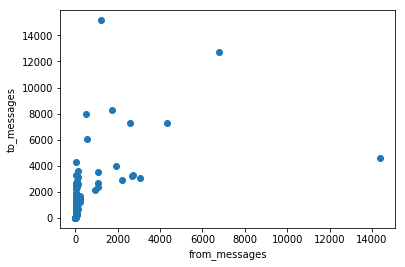

In [23]:
plt.scatter(enron_data.from_messages,enron_data.to_messages)

plt.xlabel("from_messages")
plt.ylabel("to_messages")
plt.show()

In [24]:
df_i = enron_data[(enron_data['from_messages']) > 10000 & (enron_data['to_messages'] > 10000)]

In [25]:
total = len(df_i)
poi = len(df_i[df_i['poi'] == True])

print "Number of POIs with 'from' and 'to' messages > 10000"
print poi
print "Number of people with 'from' and 'to' messages > 10000"
print total

Number of POIs with 'from' and 'to' messages > 10000
14
Number of people with 'from' and 'to' messages > 10000
86


86 people! That's much better and the % of POI (14%) is not too high to make it a discriminatory feature

This could be a good feature to perform analysis on as there are around 86 people

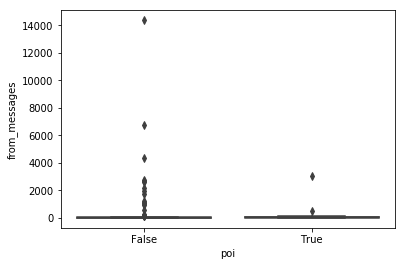

In [26]:
import seaborn as sns
sns.boxplot(data = enron_data.dropna(subset = ['poi', 'from_messages']), x = 'poi', y ='from_messages' )

In [27]:
df_fraction_to=enron_data

In [28]:
df_fraction_to['from_to_poi']=df_fraction_to['from_this_person_to_poi']*1.0/df_fraction_to['from_messages']

In [29]:

print (df_fraction_to['from_to_poi'][df_fraction_to['poi'] == True])

BELDEN TIMOTHY N        0.223140
BOWEN JR RAYMOND M      0.555556
CALGER CHRISTOPHER F    0.173611
CAUSEY RICHARD A        0.244898
COLWELL WESLEY          0.275000
DELAINEY DAVID W        0.198436
FASTOW ANDREW S              NaN
GLISAN JR BEN F         0.375000
HANNON KEVIN P          0.656250
HIRKO JOSEPH                 NaN
KOENIG MARK E           0.245902
KOPPER MICHAEL J             NaN
LAY KENNETH L           0.444444
RICE KENNETH D          0.222222
RIEKER PAULA H          0.585366
SHELBY REX              0.358974
SKILLING JEFFREY K      0.277778
YEAGER F SCOTT               NaN
Name: from_to_poi, dtype: float64


There are over 14 people who are POI we can take this feature for further analysis

# Adding New Feature

Bonus and salary ratio

In [30]:
enron_data["bonus_salary_ratio"] = enron_data["bonus"].\
divide(enron_data["salary"], fill_value = 0)

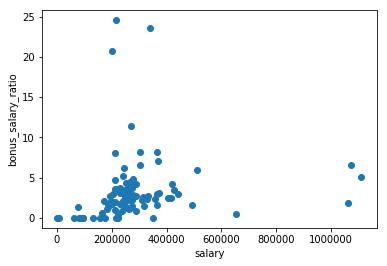

In [31]:
plt.scatter(enron_data.salary,enron_data.bonus_salary_ratio)

plt.xlabel("salary")
plt.ylabel("bonus_salary_ratio")
plt.show()

In [32]:
print "Number of POI with a ratio > 15"
print len(enron_data[(enron_data['bonus_salary_ratio'] > 15) & (enron_data['poi'] == True)])

Number of POI with a ratio > 15
1


#There is only 1 poi so it is not a good feature. 

In [33]:
enron_data['high_from_to'] = (enron_data['from_messages'] > 10000) & (enron_data['to_messages'] > 10000)

Fraction from Poi

In [34]:
enron_data["fraction_from_poi"] = enron_data["from_poi_to_this_person"].\
divide(enron_data["to_messages"], fill_value = 0)



In [35]:
enron_data["bonus_salary_ratio"] = enron_data["bonus_salary_ratio"].fillna(0.0)
enron_data["fraction_from_poi"] = enron_data["fraction_from_poi"].fillna(0.0)


In [36]:
enron_data

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,from_to_poi,bonus_salary_ratio,high_from_to,fraction_from_poi
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,False,0.0,-3081055.0,304805.0,phillip.allen@enron.com,47.0,0.029613,20.672922,False,0.016196
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,...,False,0.0,0.0,0.0,0,0.0,NaN,0.000000,False,0.000000
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,...,False,0.0,-5104.0,0.0,james.bannantine@enron.com,39.0,0.000000,0.000000,False,0.068905
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,...,False,0.0,-1386055.0,1586055.0,0,0.0,NaN,4.492666,False,0.000000
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,...,False,0.0,-201641.0,0.0,frank.bay@enron.com,0.0,NaN,1.668955,False,0.000000
BAZELIDES PHILIP J,80818.0,0.0,684694.0,860136.0,1599641.0,0.0,0.0,0.0,0.0,1599641.0,...,False,0.0,0.0,93750.0,0,0.0,NaN,0.000000,False,0.000000
BECK SALLY W,231330.0,7315.0,0.0,969068.0,0.0,700000.0,126027.0,2639.0,0.0,126027.0,...,False,0.0,0.0,0.0,sally.beck@enron.com,144.0,0.088879,3.025980,False,0.019686
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,0.0,1110705.0,...,True,0.0,-2334434.0,0.0,tim.belden@enron.com,228.0,0.223140,24.532820,False,0.028532
BELFER ROBERT,0.0,0.0,-102500.0,102500.0,3285.0,0.0,0.0,0.0,44093.0,-44093.0,...,False,3285.0,0.0,0.0,0,0.0,NaN,0.000000,False,0.000000
BERBERIAN DAVID,216582.0,0.0,0.0,228474.0,1624396.0,0.0,869220.0,0.0,0.0,2493616.0,...,False,0.0,0.0,0.0,david.berberian@enron.com,0.0,NaN,0.000000,False,0.000000


#As clear from above the new feature that we created fraction_from_poi it has values in the range of [0,1] so we can perform a scaling operation on it, This scaling operation will be beneficial for algorithms that we will use

#We dont need email address for analysis we are removing the field from the dataset.

In [46]:
del enron_data['email_address']

In [53]:
enron_data["from_to_poi"] = enron_data["from_to_poi"].fillna(0.0)


In [58]:
enron_data

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,from_to_poi,bonus_salary_ratio,high_from_to,fraction_from_poi
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,65.0,False,0.0,-3081055.0,304805.0,47.0,0.029613,20.672922,False,0.016196
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,...,0.0,False,0.0,0.0,0.0,0.0,0.000000,0.000000,False,0.000000
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,...,0.0,False,0.0,-5104.0,0.0,39.0,0.000000,0.000000,False,0.068905
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,...,0.0,False,0.0,-1386055.0,1586055.0,0.0,0.000000,4.492666,False,0.000000
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,...,0.0,False,0.0,-201641.0,0.0,0.0,0.000000,1.668955,False,0.000000
BAZELIDES PHILIP J,80818.0,0.0,684694.0,860136.0,1599641.0,0.0,0.0,0.0,0.0,1599641.0,...,0.0,False,0.0,0.0,93750.0,0.0,0.000000,0.000000,False,0.000000
BECK SALLY W,231330.0,7315.0,0.0,969068.0,0.0,700000.0,126027.0,2639.0,0.0,126027.0,...,386.0,False,0.0,0.0,0.0,144.0,0.088879,3.025980,False,0.019686
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,0.0,1110705.0,...,108.0,True,0.0,-2334434.0,0.0,228.0,0.223140,24.532820,False,0.028532
BELFER ROBERT,0.0,0.0,-102500.0,102500.0,3285.0,0.0,0.0,0.0,44093.0,-44093.0,...,0.0,False,3285.0,0.0,0.0,0.0,0.000000,0.000000,False,0.000000
BERBERIAN DAVID,216582.0,0.0,0.0,228474.0,1624396.0,0.0,869220.0,0.0,0.0,2493616.0,...,0.0,False,0.0,0.0,0.0,0.0,0.000000,0.000000,False,0.000000


In [59]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
enron_data[['salary','fraction_from_poi','long_term_incentive','bonus_salary_ratio']] = min_max_scaler.fit_transform(enron_data[['salary','fraction_from_poi','long_term_incentive','bonus_salary_ratio']])
enron_data


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,from_to_poi,bonus_salary_ratio,high_from_to,fraction_from_poi
ALLEN PHILLIP K,0.181735,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,65.0,False,0.0,-3081055.0,0.059238,47.0,0.029613,0.842664,False,0.074518
BADUM JAMES P,0.000000,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,...,0.0,False,0.0,0.0,0.000000,0.0,0.000000,0.000000,False,0.000000
BANNANTINE JAMES M,0.000429,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,...,0.0,False,0.0,-5104.0,0.000000,39.0,0.000000,0.000000,False,0.317034
BAXTER JOHN C,0.240360,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,...,0.0,False,0.0,-1386055.0,0.308245,0.0,0.000000,0.183129,False,0.000000
BAY FRANKLIN R,0.215675,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,...,0.0,False,0.0,-201641.0,0.000000,0.0,0.000000,0.068029,False,0.000000
BAZELIDES PHILIP J,0.072727,0.0,684694.0,860136.0,1599641.0,0.0,0.0,0.0,0.0,1599641.0,...,0.0,False,0.0,0.0,0.018220,0.0,0.000000,0.000000,False,0.000000
BECK SALLY W,0.208169,7315.0,0.0,969068.0,0.0,700000.0,126027.0,2639.0,0.0,126027.0,...,386.0,False,0.0,0.0,0.000000,144.0,0.088879,0.123344,False,0.090575
BELDEN TIMOTHY N,0.192574,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,0.0,1110705.0,...,108.0,True,0.0,-2334434.0,0.000000,228.0,0.223140,1.000000,False,0.131278
BELFER ROBERT,0.000000,0.0,-102500.0,102500.0,3285.0,0.0,0.0,0.0,44093.0,-44093.0,...,0.0,False,3285.0,0.0,0.000000,0.0,0.000000,0.000000,False,0.000000
BERBERIAN DAVID,0.194898,0.0,0.0,228474.0,1624396.0,0.0,869220.0,0.0,0.0,2493616.0,...,0.0,False,0.0,0.0,0.000000,0.0,0.000000,0.000000,False,0.000000


In [60]:
features_list = ['poi','bonus_salary_ratio', 'fraction_from_poi', 'salary', 'long_term_incentive', 'high_from_to']
#features_list = ['poi','bonus_salary_ratio', 'salary', 'long_term_incentive', 'high_from_to']

Storing dataset for easy export

In [61]:
my_dataset = pd.DataFrame.to_dict(enron_data, orient = 'index')

In [63]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


# Trying Classifiers

In [65]:
from sklearn.metrics import classification_report


In [66]:
def run_clf(clf, features_train, features_test, labels_train, labels_test):
    ''' takes a classifier and training and test data
    prints performance time and metrics'''
    t0 = time()
    clf.fit(features_train, labels_train)
    print "training time:", round(time()-t0, 3), "s"
    t0 = time()
    labels_prediction = clf.predict(features_test)
    print "prediction time:", round(time()-t0, 3), "s"
    report = classification_report(labels_test, labels_prediction)
    print report

In [68]:
from sklearn import metrics

In [71]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#gnb.fit(features, labels)
#print "Gaussian Naive Bayes"
#print gnb.score(features, labels)
print "Naive Bayes Classifier:"
nb_clf = GaussianNB()
run_clf(nb_clf, features_train, features_test, labels_train, labels_test)


Naive Bayes Classifier:
training time: 0.005 s
prediction time: 0.002 s
             precision    recall  f1-score   support

        0.0       0.93      0.90      0.91        29
        1.0       0.25      0.33      0.29         3

avg / total       0.86      0.84      0.85        32



In [72]:
# Decision Trees
from sklearn import tree
#tree = tree.DecisionTreeClassifier()
#tree.fit(features, labels)
#print "Decision Tree"
#print tree.score(features, labels)
print "Decision Tree"
split = tree.DecisionTreeClassifier(min_samples_split = 10)
run_clf(split, features_train, features_test, labels_train, labels_test)


Decision Tree
training time: 0.001 s
prediction time: 0.001 s
             precision    recall  f1-score   support

        0.0       0.90      0.90      0.90        29
        1.0       0.00      0.00      0.00         3

avg / total       0.81      0.81      0.81        32



In [73]:
#KNei
from sklearn.neighbors import KNeighborsClassifier
#nei=KNeighborsClassifier()
#nei.fit(features, labels)
#print "KNeighbors"
#print nei.score(features,labels)
neigh_clf = KNeighborsClassifier(n_neighbors = 3)
print "K Nearest Neighbors"
run_clf(neigh_clf, features_train, features_test, labels_train, labels_test)


K Nearest Neighbors
training time: 0.002 s
prediction time: 0.002 s
             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93        29
        1.0       0.33      0.33      0.33         3

avg / total       0.88      0.88      0.88        32



# Tuning Classifier

In [74]:
clf = GaussianNB()
print "Gaussian Naive Bayes"

Gaussian Naive Bayes


In [75]:
# using the given tester's classification function to perform 1000
# fold cross validation

test_classifier(clf, my_dataset, features_list)

GaussianNB(priors=None)
	Accuracy: 0.80064	Precision: 0.36234	Recall: 0.12700	F1: 0.18808	F2: 0.14596
	Total predictions: 11000	True positives:  254	False positives:  447	False negatives: 1746	True negatives: 8553



In [113]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
print "Decision Tree"

test_classifier(tree, my_dataset, features_list)

Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.69618	Precision: 0.16281	Recall: 0.16200	F1: 0.16241	F2: 0.16216
	Total predictions: 11000	True positives:  324	False positives: 1666	False negatives: 1676	True negatives: 7334



In [77]:
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier()
test_classifier(nei, my_dataset, features_list)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
	Accuracy: 0.79918	Precision: 0.27233	Recall: 0.06250	F1: 0.10167	F2: 0.07389
	Total predictions: 11000	True positives:  125	False positives:  334	False negatives: 1875	True negatives: 8666



Naive bayes is a good algorithm; it doesnt have a great recall but it does have a good accuracy and precision. Whenever a POI gets flagged in my test set, its very likely to be a real POI. But since we cannot play around with the parameters so will use the next best algorithm i.e. Decision Tree

In [ ]:
#from sklearn.cross_validation import train_test_split
#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3,  random_state=42)


In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#parameters = {'criterion':('gini', 'entropy'),'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[2,3,4,5]}
parameters = {'criterion':('gini', 'entropy'),'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[2,3,4,5] }

dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(features_train, labels_train)
print clf.best_params_

{'max_features': 3, 'min_samples_split': 4, 'criterion': 'gini', 'min_samples_leaf': 5}


In [ ]:
#Running the classifier with the same parameters which got generated in the last step with different feature_list

In [124]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=4, criterion='gini', min_samples_leaf=5, max_features=3)
print "Decision Tree"
features_list1 = ['poi','bonus_salary_ratio', 'fraction_from_poi', 'salary', 'long_term_incentive', 'high_from_to']

test_classifier(tree, my_dataset, features_list1)

Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.76745	Precision: 0.26750	Recall: 0.16050	F1: 0.20062	F2: 0.17446
	Total predictions: 11000	True positives:  321	False positives:  879	False negatives: 1679	True negatives: 8121



#Now modifying the feature_list and adding features one at a time

In [125]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=4, criterion='gini', min_samples_leaf=5, max_features=3)
print "Decision Tree"
features_list1 = ['poi','bonus_salary_ratio', 'salary', 'long_term_incentive', 'high_from_to']
test_classifier(tree, my_dataset, features_list1)

Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.75660	Precision: 0.29945	Recall: 0.16200	F1: 0.21025	F2: 0.17837
	Total predictions: 10000	True positives:  324	False positives:  758	False negatives: 1676	True negatives: 7242



In [126]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=4, criterion='gini', min_samples_leaf=5, max_features=3)
print "Decision Tree"
features_list1 = ['poi', 'salary', 'long_term_incentive', 'high_from_to']
test_classifier(tree, my_dataset, features_list1)

Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.76200	Precision: 0.33844	Recall: 0.19900	F1: 0.25063	F2: 0.21687
	Total predictions: 10000	True positives:  398	False positives:  778	False negatives: 1602	True negatives: 7222



In [130]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=4, criterion='gini', min_samples_leaf=5, max_features=3)
print "Decision Tree"
features_list1 = ['poi', 'salary', 'long_term_incentive', 'fraction_from_poi']
test_classifier(tree, my_dataset, features_list1)

Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.73236	Precision: 0.23090	Recall: 0.20250	F1: 0.21577	F2: 0.20761
	Total predictions: 11000	True positives:  405	False positives: 1349	False negatives: 1595	True negatives: 7651



In [ ]:
###Kneighbor

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier()
parameters = {'n_neighbors':[1,3,5,7,9,11]}
clf = GridSearchCV(nei, parameters)
clf.fit(features_train, labels_train)
print clf.best_params_

{'n_neighbors': 3}


In [107]:
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier(n_neighbors=3)
print " KNeighbors"
features_list1 = ['poi', 'salary']
test_classifier(nei, my_dataset, features_list1)


 KNeighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.74680	Precision: 0.17241	Recall: 0.07000	F1: 0.09957	F2: 0.07944
	Total predictions: 10000	True positives:  140	False positives:  672	False negatives: 1860	True negatives: 7328



In [106]:
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier(n_neighbors=3)
print " KNeighbors"
features_list1 = ['poi', 'salary','long_term_incentive']
test_classifier(nei, my_dataset, features_list1)


 KNeighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.78450	Precision: 0.41360	Recall: 0.18550	F1: 0.25613	F2: 0.20850
	Total predictions: 10000	True positives:  371	False positives:  526	False negatives: 1629	True negatives: 7474



In [105]:
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier(n_neighbors=3)
print " KNeighbors"
features_list1 = ['poi', 'long_term_incentive']
test_classifier(nei, my_dataset, features_list1)


 KNeighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.76614	Precision: 0.09114	Recall: 0.07100	F1: 0.07982	F2: 0.07428
	Total predictions: 7000	True positives:   71	False positives:  708	False negatives:  929	True negatives: 5292



In [104]:
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier(n_neighbors=3)
print " KNeighbors"
features_list1 = ['poi', 'salary', 'long_term_incentive', 'high_from_to']
test_classifier(nei, my_dataset, features_list1)


 KNeighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.78450	Precision: 0.41360	Recall: 0.18550	F1: 0.25613	F2: 0.20850
	Total predictions: 10000	True positives:  371	False positives:  526	False negatives: 1629	True negatives: 7474



In [115]:
features_list1 = ['poi','bonus_salary_ratio', 'fraction_from_poi', 'salary', 'long_term_incentive', 'high_from_to']
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier(n_neighbors=3)
print " KNeighbors"
#features_list1 = ['poi', 'salary', 'long_term_incentive', 'high_from_to']
test_classifier(nei, my_dataset, features_list1)


 KNeighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.77582	Precision: 0.24946	Recall: 0.11600	F1: 0.15836	F2: 0.12990
	Total predictions: 11000	True positives:  232	False positives:  698	False negatives: 1768	True negatives: 8302



In [116]:
features_list1 = ['poi', 'fraction_from_poi', 'salary', 'long_term_incentive', 'high_from_to']
from sklearn.neighbors import KNeighborsClassifier
nei=KNeighborsClassifier(n_neighbors=3)
print " KNeighbors"
#features_list1 = ['poi', 'salary', 'long_term_incentive', 'high_from_to']
test_classifier(nei, my_dataset, features_list1)


 KNeighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.74864	Precision: 0.16359	Recall: 0.09300	F1: 0.11858	F2: 0.10178
	Total predictions: 11000	True positives:  186	False positives:  951	False negatives: 1814	True negatives: 8049



With the addition of the best parameters the accuracy of the algorithm increased,also, precision recall and F1 score increased.

Removing the feature fraction_from_poi from the list

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=3, criterion='gini', min_samples_leaf=4)
print "Decision Tree"
features_list1 = ['poi','bonus_salary_ratio', 'salary', 'long_term_incentive', 'high_from_to']
test_classifier(tree, my_dataset, features_list1)

Removing the feature does a little impact on precision, recall and F1 score

Removing all the new features from the list

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=3, criterion='gini', min_samples_leaf=4)
print "Decision Tree"
features_list2 = ['poi', 'salary', 'long_term_incentive']
test_classifier(tree, my_dataset, features_list2)

Removing all the created features increases Accuracy, precision, recall and F1 score

Adding only one created feature high_from_to

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=3, criterion='gini', min_samples_leaf=4)
print "Decision Tree"
features_list3 = ['poi', 'salary', 'long_term_incentive', 'high_from_to']
test_classifier(tree, my_dataset, features_list3)

This is the best parameter and feature list

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split=3, criterion='gini', min_samples_leaf=4)
print "Decision Tree"
features_list4 = ['poi', 'salary', 'long_term_incentive', 'bonus_salary_ratio']
test_classifier(tree, my_dataset, features_list4)

The model with feature list ['poi', 'salary', 'long_term_incentive', 'high_from_to'] and parametersas min_samples_split=3, criterion='gini', min_samples_leaf=4 is the best model for identifying POI: Accuracy: 0.78280	Precision: 0.41917	Recall: 0.22300	F1: 0.29112
It considers both the precision and the recall of the test to compute the score.
Precision is the ability of the classifier not label as positive sample that is negative.
Recall is the ability of the classifier to find all positive samples.


In [ ]:
dump_classifier_and_data(tree, my_dataset, features_list3)